<a href="https://colab.research.google.com/github/jofmorenore/TS_Climatic/blob/main/R/Pe%C3%B1a_%26_Tsay_(2021)_Cap_6_DFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://stackoverflow.com/questions/74283327/conversion-py2rpy-not-defined-for-objects-of-type-class-str
!pip install rpy2==3.5.1

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
getwd()

[1] "/content"


In [4]:
%%R
sessionInfo()

R version 4.5.2 (2025-10-31)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

loaded via a namespace (and not attached):
[1] compiler_4.5.2


In [5]:
%%R
if("forecast" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("forecast"))}
library(forecast)

  method            from
  as.zoo.data.frame zoo 



In [6]:
%%R
library(MTS)
library(forecast)

# R commands used in Example 6.1

In [7]:
%%R
UMEdata = read.csv("/content/UME20002018.csv", header=TRUE)
x=as.matrix(UMEdata)
n=nrow(x)
G=matrix(0,n,19)
for (i in 1:19){G[,i]=x[,1+3*(i-1)]}
#for (i in 1:19){G[,i]=as.numeric(x[,1+3*(i-1)])}
print(head(G))

        [,1]    [,2]   [,3]   [,4]  [,5]     [,6]     [,7]    [,8]    [,9]
[1,] 62941.9 77022.9 3447.5 2574.9 39091 435267.0 585431.6 46582.7 30469.9
[2,] 63401.2 77533.7 3506.4 2642.9 39070 439390.4 591494.9 47002.2 31317.8
[3,] 63771.5 77844.3 3506.9 2672.7 39730 442224.9 590656.4 47858.0 32235.6
[4,] 64441.7 78541.7 3523.4 2745.2 40198 445791.8 591107.9 48534.3 32597.4
[5,] 64361.5 78482.0 3559.1 2774.1 40606 448226.4 600702.5 49170.8 32863.5
[6,] 64266.4 78439.7 3577.2 2820.6 40390 448797.4 601347.5 49011.4 33289.4
        [,10]  [,11]  [,12]  [,13]  [,14]    [,15]   [,16]   [,17]  [,18]
[1,] 384816.8 3010.8 4500.3 7675.4 1322.5 137404.3 41602.0 10344.0 6819.8
[2,] 387503.2 3037.8 4543.1 7601.5 1364.4 138938.8 41358.1 10448.8 6958.6
[3,] 389627.4 3101.5 4591.1 7717.9 1337.0 140085.3 41934.3 10516.9 7033.2
[4,] 395806.7 3090.8 4669.8 7780.0 1368.5 141906.0 42250.9 10584.8 7079.0
[5,] 397164.9 3129.9 4805.0 7904.5 1348.2 142060.0 42150.3 10653.9 7152.6
[6,] 396177.8 3329.4 4793.8 774

In [8]:
%%R
G0=log(G)
sG0=scale(G0)
G1=diff(sG0)
print(head(G1))

            [,1]         [,2]        [,3]       [,4]         [,5]       [,6]
[1,]  0.08979384  0.083784805 0.157327468 0.14905033 -0.007586094 0.14848924
[2,]  0.07192184  0.050677228 0.001324204 0.06411437  0.236492241 0.10126821
[3,]  0.12911460  0.113054355 0.043593145 0.15304524  0.165325899 0.12651628
[4,] -0.01537969 -0.009638501 0.093625171 0.05988316  0.142567330 0.08577419
[5,] -0.01826187 -0.006833729 0.047110067 0.09505458 -0.075297444 0.02004964
[6,]  0.02351843 -0.025412412 0.307936671 0.02144897  0.095100811 0.05934948
            [,7]        [,8]       [,9]       [,10]       [,11]       [,12]
[1,]  0.14059882  0.07977816 0.12133537  0.26691763  0.04712485  0.04646233
[2,] -0.01935745  0.16056651 0.12769003  0.20975127  0.10954041  0.05158940
[3,]  0.01042666  0.12487029 0.04933947  0.60372700 -0.01824192  0.08342913
[4,]  0.21970868  0.11594239 0.03594039  0.13143427  0.06635619  0.14009475
[5,]  0.01464385 -0.02889421 0.05692228 -0.09547786  0.32616234 -0.01145479
[6,] 

## Figure 6.1 Time plots of the growth rates of the GDP of 19 Euro countries from 2000.II to 2018.IV.

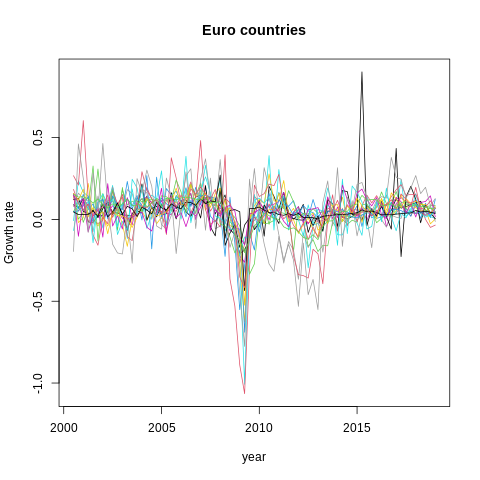

In [9]:
%%R
y1 <- range(G1)
tdx <- c(2:76)/4+2000
plot(tdx,G1[,1],xlab="year",ylab="Growth rate", main="Euro countries", type="l", ylim=y1)
for (i in 2:19){lines(tdx,G1[,i],col=i)}

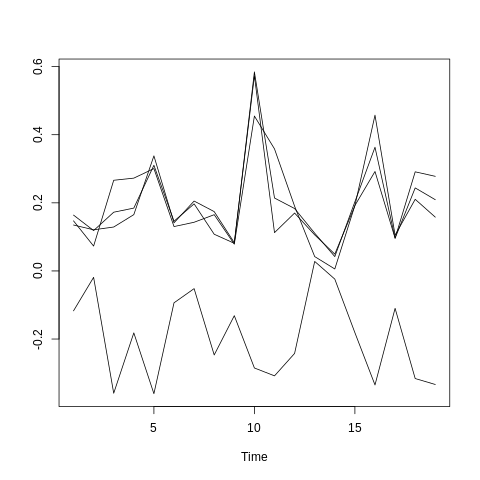

In [10]:
%%R
out=acf(G1,lag.max=4,type="covariance",plot=FALSE)
# rezago h = 0
S0=eigen(out$acf[1,,])
E0=S0$values[1:4]
EVf0=S0$vectors[,1]
EVs0=S0$vectors[,2]
# rezago h = 1
S1=eigen(out$acf[2,,])
S1$values[1:4] # May have complex eigenvalues
Mod(S1$values[1:4])
E1=S1$values[1:4]
EVf1=S1$vectors[,1]
EVs1=S1$vectors[,2]
# rezago h = 2
S2=eigen(out$acf[3,,])
S2$values[1:4] # May have complex eigenvalues
Mod(S2$values[1:4])
E2=S2$values[1:4]
EVf2=S2$vectors[,1]
EVs2=S2$vectors[,2]
# rezago h = 3
S3=eigen(out$acf[4,,])
S3$values[1:4] # May have complex eigenvalues
Mod(S3$values[1:4])
E3=S3$values[1:4]
EVf3=S3$vectors[,1]
EVs3=S3$vectors[,2]

EVf=cbind(EVf0,EVf1,EVf2,EVf3)
EVs=cbind(EVs0,EVs1,EVs2,EVs3) # Not shown
ts.plot(EVf)

## Figure 6.2 Loadings of the first eigenvalues of the autocovariance matrices, lag 0 to lag 3, of the GDP growth rates of 19 Euro countries.

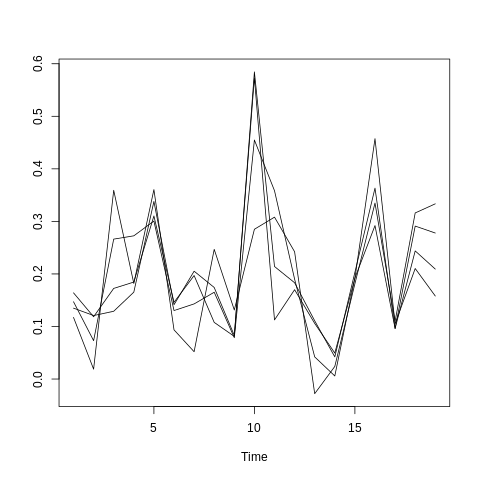

In [11]:
%%R
EVf=cbind(EVf0,EVf1,EVf2,-EVf3) # Change some signs
ts.plot(EVf) # re-plot.

# Functions Library SLBDD

In [12]:
%%R
dfmpc <- function(x, stand = 0, mth = 4, r, lagk = 0){

  if(stand == 0)
    x <- x

  if(stand == 1)
    x <- scale(x, center = TRUE, scale = FALSE)

  if(stand == 2)
    x <- scale(x, center = TRUE, scale = TRUE)

  N <- ncol(x)
  T <- nrow(x)
  rmax <- round(N/2,digits = 0)

  if (lagk == 0){
    k0 <- 3
  }else{
    k0 <- lagk
  }

  if (mth == 0){

    if(missing(r)) {
      warning("the number of factors, r, must be given by the user.")
      stop()
    }

    if(r==0) {
      warning("the number of factors must be larger than 0")
      stop()
    }

    output <- PCest(x,r)

  }

  if (mth == 1){

    if(missing(r)) {
      warning("the number of factors, r, must be given by the user.")
      stop()
    }

    if(r==0) {
      warning("the number of factors must be larger than 0")
      stop()
    }

    output <- Mkest(x,r,k0)

  }

  if (mth == 2){

    r <- BaiNgcrit(x, kmax = rmax, mtx = "PC")

    output <- PCest(x,r)

  }

  if (mth == 3){

    r <- BaiNgcrit(x, kmax = rmax, mtx = "Mk")

    output <- Mkest(x,r,k0)

  }

  if (mth == 4){

    r <- LamYaotest(x, k0, rmax)$r1

    output <- Mkest(x,r,k0)

  }

  if (mth == 5){

    r <- AhnHortest(x, rmax)$r1

    output <- PCest(x,r)

  }

  if (mth == 6) {

    r <- CaroPenatest(x, k0, rmax)$r1

    output <- Mkest_CP(x,r,k0)

  }

  F <- output$F
  L <- output$L
  E <- output$E
  varF <- output$varF[1:r,]

  armamdlF <- matrix(0,ncol = 7,nrow = ncol(F))
  colnames(armamdlF) <- c("AR","MA","sAR","sMA","period","d","sd")
  for (i in 1:ncol(F)){
    f <- F[,i]
    outputF <- auto.arima(f)
    armamdlF[i,] <- outputF$arma
  }

  armamdlE <- matrix(0,ncol = 7,nrow = ncol(E))
  colnames(armamdlE) <- c("AR","MA","sAR","sMA","period","d","sd")
  for (i in 1:ncol(E)){
    e <- E[,i]
    outputE <- auto.arima(e)
    armamdlE[i,] <- outputE$arma
  }

  varE <- diag(round(var(E),digits = 2))
  armamdlE <- cbind(armamdlE,varE)

  MarmaF <- armamdlF
  MarmaE <- armamdlE

  result <- list( r, F, L, E, varF, MarmaF,MarmaE)
  names(result) <- c( "r", "F", "L", "E","varF","MarmaF","MarmaE")
  class(result) <- "dfm"
  return(result)
}

In [13]:
%%R
LamYaotest <- function (X, k0, kmax){
  N <- dim(X)[1]
  P <- dim(X)[2]

  if(missing(kmax)) kmax <- round(P/2,digits = 0)

  if (k0==1){
    dW=cov(X[2:N,], X[1:(N-1),])
    Wy=dW%*%t(dW)
    eA=eigen(Wy, symmetric=T)
    ev=sort(eA$values, decreasing = TRUE)
  } else {
    dW=cov(X[2:N,], X[1:(N-1),])
    Wy=dW%*%t(dW)
    for(k in 2:k0) { dW=cov(X[(k+1):N,], X[1:(N-k),])
    Wy=Wy + dW%*%t(dW)
    }
    eA=eigen(Wy, symmetric=T)
    ev=sort(eA$values, decreasing = TRUE)
  }
  ratio <- rep(0,kmax)
  for (j in 1:kmax){
    ratio[j] <- ev[j]/ev[(j+1)]
  }
  r1 = which.max(ratio)

  results <- list(r1=r1, ratio=ratio, Wy=Wy)
  return(results)
}

In [14]:
%%R
Mkest <- function(X, r, k0){

  T <- nrow(X)
  N <- ncol(X)

  dW=cov(X[2:T,], X[1:(T-1),])
  Wy=dW%*%t(dW)
  for(k in 2:k0) { dW=cov(X[(k+1):T,], X[1:(T-k),])
  Wy=Wy + dW%*%t(dW)}

  Mk=Wy

  EDMk <- eigen(Mk)
  indexMk <- order(EDMk$values[1:r], decreasing = TRUE)

  LMk <- EDMk$vectors[,indexMk]

  lambdahatMk <- LMk

  fhatMk <- X%*%lambdahatMk

  normMk <- round(t(lambdahatMk)%*%lambdahatMk)

  fhatMk <- as.matrix(fhatMk)
  colnames(fhatMk) <- paste("f",1:r, sep = "")

  chatMk <- fhatMk%*%t(lambdahatMk)
  ehatMk <- X-chatMk
  eigvaluesMk <- EDMk$values

  FMk <- fhatMk
  LMk <- lambdahatMk
  EMk <- ehatMk


  pvarMk <- eigvaluesMk*100/sum(eigvaluesMk)
  cumvarMk <- cumsum(pvarMk)
  varFMk <- data.frame(varMk=round(pvarMk,digits = 3), cumvarMk=round(cumvarMk,digits = 3))



  resultMk <- list(FMk, LMk, EMk, varFMk)
  names(resultMk) <- c( "F", "L", "E","varF")
  class(resultMk) <- "dfm"
  return(resultMk)
}

In [15]:
%%R
PCest <- function (X, r){

  T <- nrow(X)
  N <- ncol(X)

  if(T <= N){

    XXt <- X%*%t(X)
    ED <- eigen(XXt)
    index <- order(ED$values[1:r], decreasing = TRUE)

    L <- ED$vectors[,index]

    fhat <- L*sqrt(T)

    lambdahat <- t(X)%*%fhat/T

    norm <- round(t(fhat)%*%fhat/T)
  }else{
    XtX <- t(X)%*%X
    ED <- eigen(XtX)
    index <- order(ED$values[1:r], decreasing = TRUE)

    L <- ED$vectors[,index]

    lambdahat <- L*sqrt(N)

    fhat <- X%*%lambdahat/N

    norm <- round(t(lambdahat)%*%lambdahat/N)
  }

  fhat <- as.matrix(fhat)
  colnames(fhat) <- paste("f",1:r, sep = "")

  chat <- fhat%*%t(lambdahat)
  ehat <- X-chat

  F <- fhat
  L <- lambdahat
  E <- ehat
  eigvalues <- ED$values

  pvar <- eigvalues*100/sum(eigvalues)
  cumvar <- cumsum(pvar)
  varF <- data.frame(var=round(pvar,digits = 3), cumvar=round(cumvar,digits = 3))

  result <- list( r, F, L, E, varF)
  names(result) <- c( "r", "F", "L", "E","varF")
  class(result) <- "dfm"
  return(result)
}


# R commands for DFM analysis: Continue from Example 6.1.

In [16]:
%%R
out=dfmpc(G1)
out$r # output is not shown.

[1] 1


In [17]:
%%R
dim(out$F)

[1] 75  1


In [18]:
%%R
out$L

 [1] -0.15354231 -0.09969060 -0.21706261 -0.19799227 -0.31765173 -0.13762036
 [7] -0.17627686 -0.13618898 -0.08652208 -0.53739940 -0.24702634 -0.18602797
[13] -0.07968105 -0.03633711 -0.20067393 -0.36672135 -0.09836747 -0.26280560
[19] -0.24005605


## Figure 6.3 Time plot of the first common factor for the growth rates of the GDP series of 19 Euro countries.


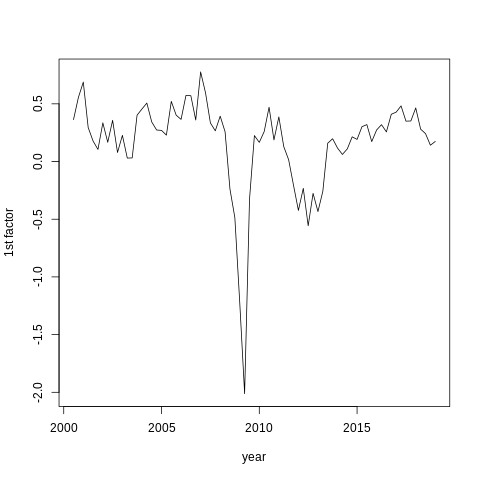

In [19]:
%%R
plot(tdx,-out$F[,1],xlab='year',ylab='1st factor',type='l')

## Figure 6.4 Loadings for the first common factor for the growth rates of the GDP series of 19 Euro countries.

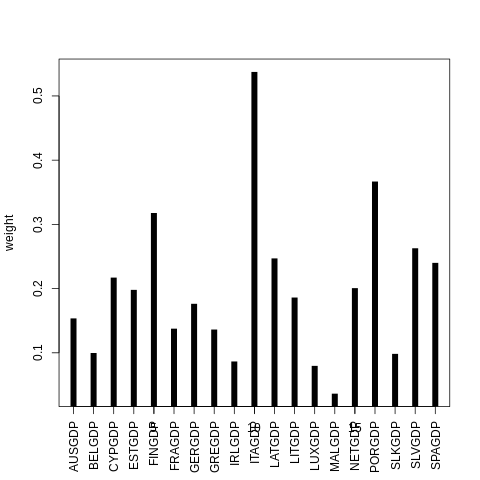

In [20]:
%%R
plot(1:19,-out$L,xlab='',ylab='weight',type='h', lwd = 8, lend = 1 )
x_labels = c('AUSGDP', 'BELGDP', 'CYPGDP', 'ESTGDP', 'FINGDP', 'FRAGDP', 'GERGDP', 'GREGDP',
             'IRLGDP', 'ITAGDP', 'LATGDP', 'LITGDP', 'LUXGDP', 'MALGDP', 'NETGDP', 'PORGDP',
             'SLKGDP', 'SLVGDP', 'SPAGDP')
axis(1, at = seq(1,19,1), labels = x_labels, cex.axis = 1, las = 2)

In [21]:
%%R
out$MarmaF

     AR MA sAR sMA period d sd
[1,]  1  0   0   0      1 0  0


In [22]:
%%R
out$MarmaE

      AR MA sAR sMA period d sd varE
 [1,]  1  0   0   0      1 0  0 0.00
 [2,]  2  2   0   0      1 0  0 0.00
 [3,]  3  1   0   0      1 0  0 0.01
 [4,]  0  3   0   0      1 0  0 0.01
 [5,]  0  1   0   0      1 0  0 0.01
 [6,]  0  0   0   0      1 0  0 0.00
 [7,]  0  1   0   0      1 1  0 0.01
 [8,]  2  0   0   0      1 1  0 0.01
 [9,]  1  0   0   0      1 0  0 0.02
[10,]  0  0   0   0      1 0  0 0.01
[11,]  0  1   0   0      1 0  0 0.01
[12,]  1  2   0   0      1 0  0 0.01
[13,]  1  0   0   0      1 0  0 0.01
[14,]  0  2   0   0      1 1  0 0.01
[15,]  0  0   0   0      1 0  0 0.00
[16,]  0  0   0   0      1 0  0 0.03
[17,]  1  0   0   0      1 0  0 0.00
[18,]  0  0   0   0      1 0  0 0.00
[19,]  0  1   0   0      1 0  0 0.00


# R commands for Example 6.3.

## Figure 6.5 Time plots of the growth rates of 57 economic variables of the 19 countries in European Monetary Union. Quarterly data from 2000 to 2018.

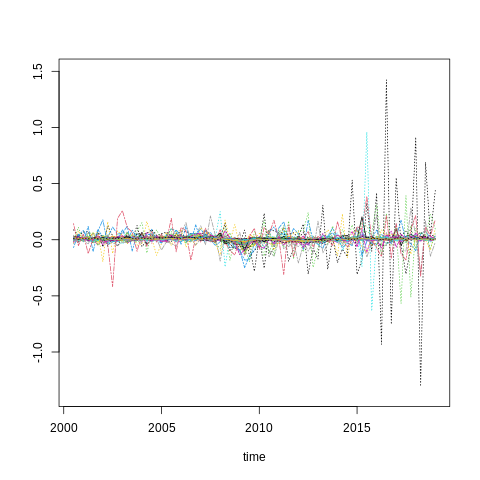

In [23]:
%%R
x=as.matrix(UMEdata)
y=log(x)
y1=diffM(y)
tdx<- c(2:76)/4+2000 # calendar time
MTSplot(y1,tdx)

## Figure 6.6 Time plot of the first common factor of the 57 economic growth rates of the EMU countries.

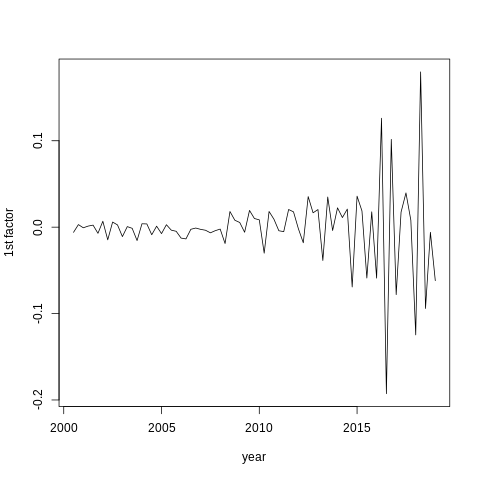

In [24]:
%%R
sal1=dfmpc(y1, stand = 0, mth = 0, r = 1, lagk = 0)
plot(tdx,sal1$F[,1],xlab='year',ylab='1st factor',type='l')

## Figure 6.7 Loadings of the first common factor of the 57 economic growth rates of the EMU countries.

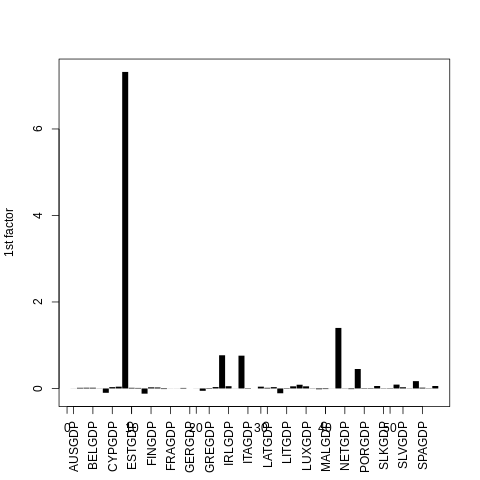

In [25]:
%%R
plot(1:57,-sal1$L,xlab='',ylab='1st factor',type='h', lwd = 8, lend = 1)
axis(1, at = seq(1,57,3), labels = x_labels, cex.axis = 1, las = 2)

## Figure 6.9 Time plots of standardized growth rates of 57 economic series of the 19 countries in European Monetary Union. Quarterly data from 2000 to 2018.

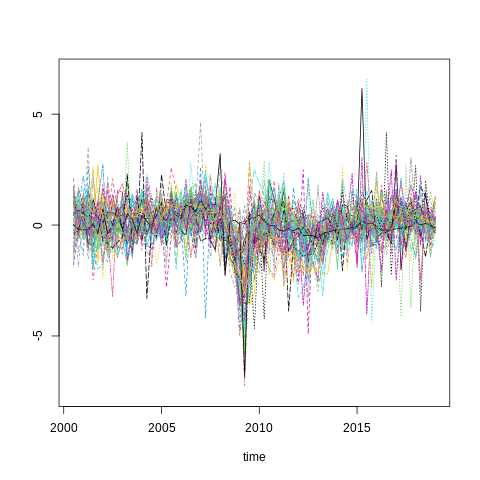

In [26]:
%%R
sy1=scale(y1)
sal2=dfmpc(sy1, stand = 0, mth = 0, r = 1, lagk = 0)
MTSplot(sy1,tdx)

## Figure 6.10 Time plot of the first common factor for the standardized growth rates of the EMU countries.

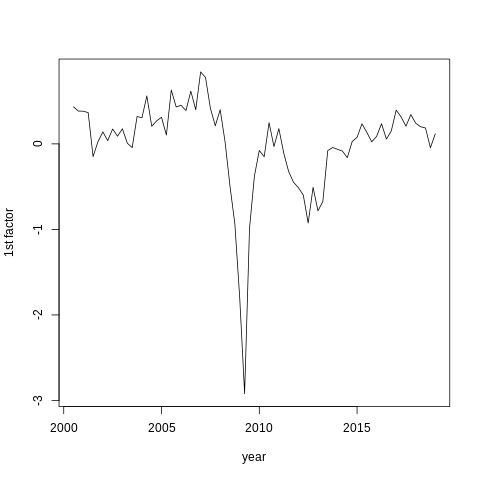

In [27]:
%%R
plot(tdx,-sal2$F[,1],xlab='year',ylab='1st factor',type='l')

## Figure 6.11 Loadings of the first common factor on the standardized growth rates of the EMU countries.

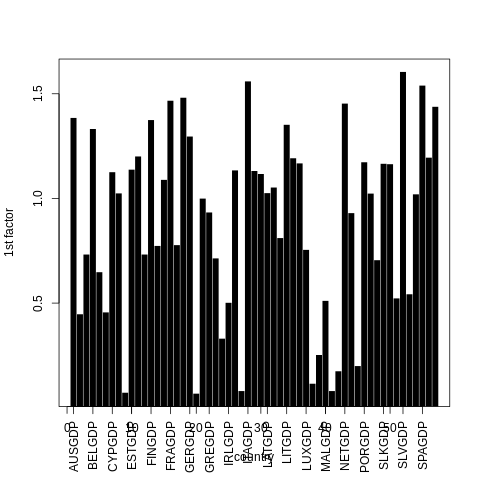

In [28]:
%%R
plot(1:57,-sal2$L,xlab='country',ylab='1st factor',type='h', lwd = 8, lend = 1)
axis(1, at = seq(1,57,3), labels = x_labels, cex.axis = 1, las = 2)

# R commands used for Example 6.5:

In [29]:
%%R
x=as.matrix(UMEdata)
n=nrow(x)
G=matrix(0,n,19)
for (i in 1:19){G[,i]=x[,1+3*(i-1)]}
G0=log(G)
G1=scale(G0)
print(head(G1))

          [,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]
[1,] -1.860655 -1.863216 -2.272771 -2.311155 -2.255403 -2.057361 -1.440447
[2,] -1.770861 -1.779432 -2.115444 -2.162104 -2.262989 -1.908872 -1.299848
[3,] -1.698939 -1.728754 -2.114119 -2.097990 -2.026497 -1.807604 -1.319206
[4,] -1.569825 -1.615700 -2.070526 -1.944945 -1.861171 -1.681087 -1.308779
[5,] -1.585204 -1.625339 -1.976901 -1.885062 -1.718604 -1.595313 -1.089070
[6,] -1.603466 -1.632172 -1.929791 -1.790007 -1.793901 -1.575264 -1.074427
           [,8]      [,9]      [,10]     [,11]     [,12]     [,13]     [,14]
[1,] -1.0082467 -1.699114 -1.4411156 -2.276352 -2.215071 -1.746462 -1.293078
[2,] -0.9284685 -1.577778 -1.1741979 -2.229227 -2.168609 -1.814644 -1.134760
[3,] -0.7679020 -1.450088 -0.9644467 -2.119686 -2.117019 -1.707547 -1.237729
[4,] -0.6430317 -1.400749 -0.3607197 -2.137928 -2.033590 -1.651069 -1.119530
[5,] -0.5270893 -1.364808 -0.2292854 -2.071572 -1.893496 -1.539186 -1.195387
[6,] -0.55598

## Figure 6.16 Time plots of the log GDP series for the 19 countries of the EMU.

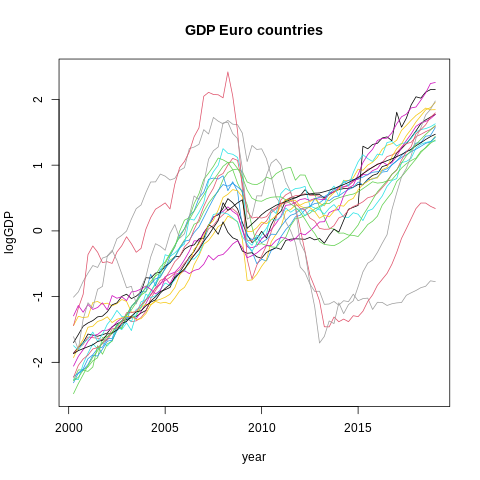

In [30]:
%%R
##the data in logs and scale is in G1
y1 <- range(G1)
tdx <- c(1:76)/4+2000
plot(tdx,G1[,1],xlab="year",ylab="logGDP", main="GDP Euro countries", type="l", ylim=y1)
for (i in 2:19){lines(tdx,G1[,i],col=i)}

In [31]:
%%R
out=acf(G1,lag.max=5,type="covariance",plot=FALSE)

S0=eigen(out$acf[1,,])
E0=S0$values[1:5]
EVf0=S0$vectors[,1]
EVs0=S0$vectors[,2]

S1=eigen(out$acf[2,,])
E1=S1$values[1:5]
EVf1=S1$vectors[,1]
EVs1=S1$vectors[,2]

S2=eigen(out$acf[3,,])
E2=S2$values[1:5]
EVf2=S2$vectors[,1]
EVs2=S2$vectors[,2]

S3=eigen(out$acf[4,,])
E3=S3$values[1:5]
EVf3=S3$vectors[,1]
EVs3=S3$vectors[,2]

S4=eigen(out$acf[5,,])
E4=S4$values[1:5]
EVf4=S4$vectors[,1]
EVs4=S4$vectors[,2]

S5=eigen(out$acf[6,,])
E5=S5$values[1:5]
EVf5=S5$vectors[,1]
EVs5=S5$vectors[,2]

In [32]:
%%R
## Same commands to compute S1-S5 to EVs1-EVs5
EVf=cbind(EVf0,EVf1,EVf2,EVf3,EVf4,EVf5)
EVs=cbind(EVs0,EVs1,EVs2,EVs3,EVs4,EVs5)
out=dfmpc(G1)
out$r

[1] 2


## Figure 6.17 Time plot of the two factors for the standardized logGDP series for the 19 countries in the EMU. The first factor is in red and solid line and the second in blue and points line.

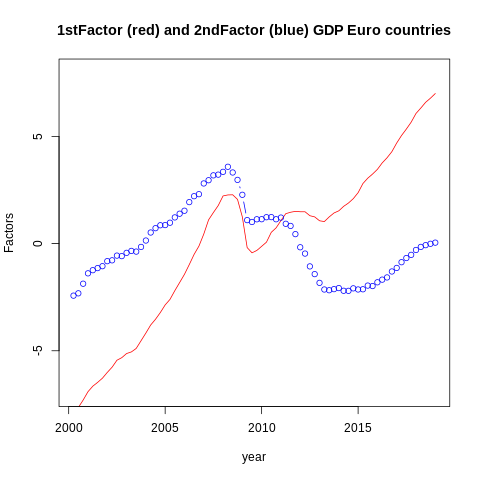

In [33]:
%%R
y1 <- range(out$F)
tdx <- c(1:76)/4+2000
plot(tdx,-out$F[,1],xlab="year",ylab="Factors", main="1stFactor (red) and 2ndFactor (blue) GDP Euro countries", type="l",ylim=y1,col="red")
lines(tdx,-out$F[,2], type="b", col="blue")

## Figure 6.18 Loadings for the two factors of the logGDP series for the 19 countries of the EMU.

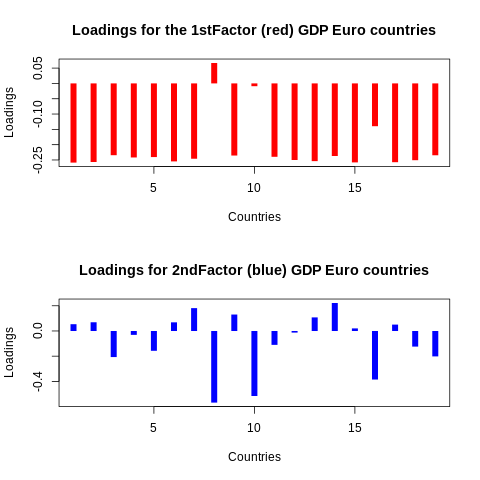

In [34]:
%%R
par(mfrow=c(2,1))
plot(out$L[,1],xlab="Countries",ylab="Loadings", main="Loadings for the 1stFactor (red) GDP Euro countries", type="h",col="red",lwd = 8, lend = 1)
plot(out$L[,2],xlab="Countries",ylab="Loadings", main="Loadings for 2ndFactor (blue) GDP Euro countries", type="h",col="blue", lwd = 8, lend = 1)